In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [4]:
df_train = pd.read_csv('/Users/maraburgo/Library/CloudStorage/OneDrive-UniversityofPisa/Universitá/Magistrale/Informatica Umanistica/Semestre I/A Data Mining - Fundamentals/ProgettoDM2024/train.csv') 
df_test = pd.read_csv('/Users/maraburgo/Library/CloudStorage/OneDrive-UniversityofPisa/Universitá/Magistrale/Informatica Umanistica/Semestre I/A Data Mining - Fundamentals/ProgettoDM2024/test.csv')

In [5]:
df_train['runtimeMinutes'] = df_train['runtimeMinutes'].replace(r'\N', np.nan)

#Converto tutta la colonna in numerici (i NaN restano tali)
df_train['runtimeMinutes'] = pd.to_numeric(df_train['runtimeMinutes'])

In [6]:
sorted_df = df_train.sort_values(by='runtimeMinutes', ascending=False) # vado a vedere quale titleType ha i runtimeMinutes più alti
sorted_df.head(10)

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,worstRating,bestRating,totalImages,...,titleType,awardNominationsExcludeWins,canHaveEpisodes,isRatable,isAdult,numRegions,userReviewsTotal,ratingCount,countryOfOrigin,genres
13997,Alim Dayi,"(5, 6]",1991,1995,3000.0,0.0,47,1,10,4,...,tvSeries,0,True,True,0,1,0,47,['TR'],Comedy
1280,Jerry Lewis MDA Labor Day Telethon,"(6, 7]",1966,2014,1290.0,1.0,139,1,10,29,...,tvSeries,2,True,True,0,1,1,139,['US'],News
1098,Voice of the Planet,"(6, 7]",1991,1991,600.0,NaN,34,1,10,0,...,tvMiniSeries,0,True,True,0,1,0,34,['US'],\N
6333,Orbius,"(7, 8]",2020,\N,570.0,0.0,432,1,10,9,...,movie,0,False,True,0,1,0,432,['RU'],Fantasy
5998,Heritage: Civilization and the Jews,"(7, 8]",1984,\N,540.0,3.0,58,1,10,16,...,tvSeries,2,True,True,0,1,1,59,"['US', 'CA']",Documentary
485,Selambs,"(7, 8]",1979,1979,528.0,0.0,19,1,10,2,...,tvMiniSeries,0,True,True,0,1,1,19,['SE'],Drama
6147,Pacífico. Un viaje a los confines del hombre,"(8, 9]",2016,2016,520.0,0.0,28,1,10,1,...,tvSeries,0,True,True,0,2,0,28,['ES'],Documentary
5532,Radosti zemnye,"(6, 7]",1988,\N,471.0,0.0,9,1,10,2,...,tvMiniSeries,0,True,True,0,1,0,9,['SUHH'],Romance
6378,Willem van Oranje,"(7, 8]",1984,1984,438.0,0.0,184,1,10,3,...,tvMiniSeries,0,True,True,0,2,1,184,"['NL', 'BE']","Biography,Drama,History"
1254,Los nº1 de 40 en concierto,"(6, 7]",2006,\N,420.0,NaN,12,1,10,0,...,tvSpecial,0,False,True,0,1,0,12,['ES'],Music


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16431 entries, 0 to 16430
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   originalTitle                16431 non-null  object 
 1   rating                       16431 non-null  object 
 2   startYear                    16431 non-null  int64  
 3   endYear                      16431 non-null  object 
 4   runtimeMinutes               11579 non-null  float64
 5   awardWins                    13813 non-null  float64
 6   numVotes                     16431 non-null  int64  
 7   worstRating                  16431 non-null  int64  
 8   bestRating                   16431 non-null  int64  
 9   totalImages                  16431 non-null  int64  
 10  totalVideos                  16431 non-null  int64  
 11  totalCredits                 16431 non-null  int64  
 12  criticReviewsTotal           16431 non-null  int64  
 13  titleType       

In [8]:
numRegions = df_train[df_train['numRegions'] > 3]
numRegions.head()

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,worstRating,bestRating,totalImages,...,titleType,awardNominationsExcludeWins,canHaveEpisodes,isRatable,isAdult,numRegions,userReviewsTotal,ratingCount,countryOfOrigin,genres
4,Seutateueob,"(7, 8]",2020,2020,80.0,1.0,15718,1,10,347,...,tvSeries,1,True,True,0,32,452,15746,['KR'],"Comedy,Drama,Romance"
7,Nanba MG5,"(7, 8]",2022,\N,NaN,0.0,70,1,10,7,...,tvMiniSeries,0,True,True,0,14,0,70,['JP'],Comedy
13,The Formula,"(2, 3]",2014,\N,90.0,1.0,762,1,10,6,...,movie,0,False,True,0,5,4,762,['US'],"Comedy,Romance"
14,Kako ubiv svetec,"(6, 7]",2004,\N,82.0,1.0,322,1,10,1,...,movie,3,False,True,0,6,2,322,"['FR', 'MK', 'SI']",Drama
20,The New Batman Adventures,"(8, 9]",1997,1999,30.0,6.0,19746,1,10,719,...,tvSeries,10,True,True,0,31,41,19758,['US'],"Action,Adventure,Animation"


In [9]:
videoGame = df_train.loc[df_train['titleType']=='videoGame', ['runtimeMinutes', 'titleType']]
print(videoGame.to_string())


       runtimeMinutes  titleType
1                 NaN  videoGame
258               NaN  videoGame
278               NaN  videoGame
288               NaN  videoGame
307               NaN  videoGame
357               NaN  videoGame
414               NaN  videoGame
431               NaN  videoGame
451               NaN  videoGame
508               NaN  videoGame
534               NaN  videoGame
733               NaN  videoGame
770               NaN  videoGame
777               NaN  videoGame
982               NaN  videoGame
1067              NaN  videoGame
1141              NaN  videoGame
1359              NaN  videoGame
1426              NaN  videoGame
1473              NaN  videoGame
1493              NaN  videoGame
1690              NaN  videoGame
1722              NaN  videoGame
1745              NaN  videoGame
1836              NaN  videoGame
1839              NaN  videoGame
1892              NaN  videoGame
1957              NaN  videoGame
1959              NaN  videoGame
1964      

In [10]:
film = df_train[df_train['totalCredits']>1500]
film.head()

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,worstRating,bestRating,totalImages,...,titleType,awardNominationsExcludeWins,canHaveEpisodes,isRatable,isAdult,numRegions,userReviewsTotal,ratingCount,countryOfOrigin,genres
681,Mission: Impossible - Ghost Protocol,"(7, 8]",2011,\N,132.0,5.0,534383,1,10,319,...,movie,30,False,True,0,52,694,534477,"['US', 'AE', 'RU', 'CA', 'CZ', 'IN']","Action,Adventure,Thriller"
2294,Bandstand,"(7, 8]",1952,1989,NaN,4.0,410,1,10,30,...,tvSeries,11,True,True,0,6,10,410,['US'],"Music,Talk-Show"
2659,Mission: Impossible - Fallout,"(7, 8]",2018,\N,NaN,26.0,385052,1,10,440,...,movie,41,False,True,0,55,1821,385231,"['US', 'CN', 'FR', 'NO']","Action,Adventure,Thriller"
3655,Harry Potter and the Deathly Hallows - Part 2,"(8, 9]",2011,\N,130.0,49.0,966565,1,10,552,...,movie,95,False,True,0,60,1135,967042,"['GB', 'US']","Adventure,Family,Fantasy"
4071,Días de cine,"(6, 7]",1991,\N,NaN,8.0,341,1,10,2,...,tvSeries,1,True,True,0,1,0,341,['ES'],News


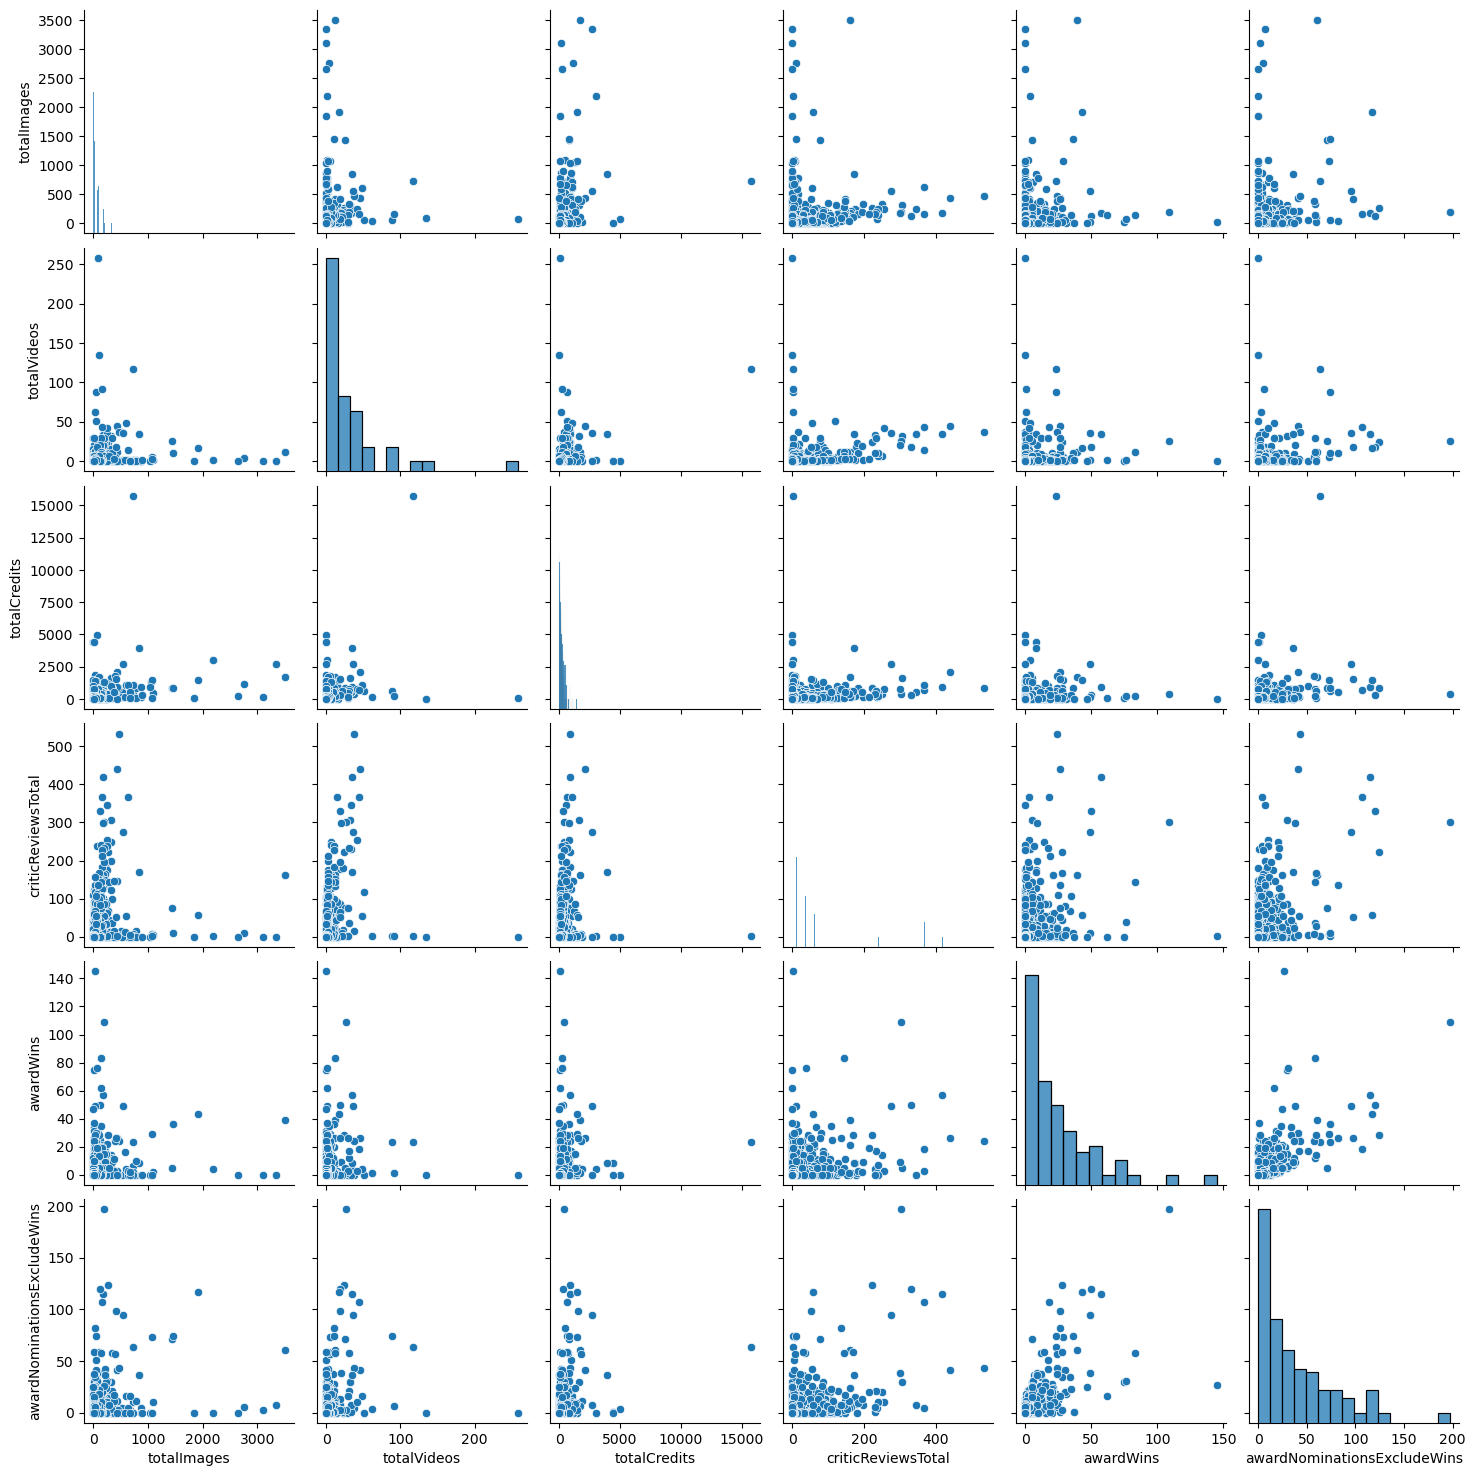

In [11]:
sns.pairplot(df_train[['totalImages', 'totalVideos','totalCredits', 'criticReviewsTotal', 'awardWins', 'awardNominationsExcludeWins']])
plt.yscale('log')  # scala logaritmica per l'asse y
plt.show()

In [12]:
tvEpisode = df_train[df_train['titleType'] == 'tvEpisode']
tvEpisode.sort_values(by='runtimeMinutes', ascending=False)

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,worstRating,bestRating,totalImages,...,titleType,awardNominationsExcludeWins,canHaveEpisodes,isRatable,isAdult,numRegions,userReviewsTotal,ratingCount,countryOfOrigin,genres
6286,The Fear of Isolation,"(8, 9]",2017,\N,249.0,0.0,53,1,10,1,...,tvEpisode,0,False,True,0,1,0,53,['US'],"Adventure,Fantasy"
3647,Path of Brass,"(8, 9]",2016,\N,241.0,0.0,46,1,10,1,...,tvEpisode,0,False,True,0,1,0,46,['US'],"Adventure,Fantasy"
8147,The Neverending Day,"(7, 8]",2021,\N,225.0,0.0,22,1,10,1,...,tvEpisode,0,False,True,0,1,0,22,['US'],"Adventure,Fantasy"
8787,Raishan,"(8, 9]",2017,\N,204.0,0.0,51,1,10,1,...,tvEpisode,0,False,True,0,1,0,51,['US'],"Adventure,Fantasy"
10982,Sinning in Cincinnati,"(7, 8]",1999,\N,180.0,0.0,17,1,10,0,...,tvEpisode,0,False,True,0,1,1,17,['US'],"Action,Sport"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16398,Who's Who on the Choo Choo?,"(4, 5]",1995,\N,NaN,NaN,12,1,10,2,...,tvEpisode,0,False,True,0,1,0,12,['US'],Family
16400,Ponniyin Selvan Special,"(7, 8]",2022,\N,NaN,0.0,6,1,10,9,...,tvEpisode,0,False,True,0,1,0,6,['IN'],"Comedy,Talk-Show"
16406,Plot Twist,"(6, 7]",2004,\N,NaN,0.0,154,1,10,1,...,tvEpisode,0,False,True,0,1,0,154,['US'],"Comedy,Romance"
16414,Episode dated 6 April 2005,"(7, 8]",2005,\N,NaN,0.0,5,1,10,0,...,tvEpisode,0,False,True,0,7,0,5,['BR'],"Drama,Romance"


In [13]:
# Qui ho controllato - basandomi su alcune caratteristiche in comune quali titleType = tvEpisode, countryOfOrigin = US e genre=Adventure, Fantasy
# se la serie Critical Role é presente nell'elenco delle tvSeries visto che sono presenti molti episodi 
# di questa serie (Path of Brass, The Fear of Isolation, ecc.). La serie non é presente nel db. 

In [14]:
tvSeries = df_train[df_train['originalTitle'] == 'Critical Role']
tvSeries.sort_values(by='runtimeMinutes', ascending=False)

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,worstRating,bestRating,totalImages,...,titleType,awardNominationsExcludeWins,canHaveEpisodes,isRatable,isAdult,numRegions,userReviewsTotal,ratingCount,countryOfOrigin,genres


In [15]:
film = df_train[
    (df_train['titleType'] == 'tvEpisode') &
    (df_train['countryOfOrigin'].apply(lambda x: 'US' in x)) &
    (df_train['genres'] == 'Adventure,Fantasy')]
print(film)

                  originalTitle  rating  startYear endYear  runtimeMinutes  \
3647              Path of Brass  (8, 9]       2016      \N           241.0   
6286      The Fear of Isolation  (8, 9]       2017      \N           249.0   
7008  In the Belly of the Beast  (8, 9]       2016      \N             NaN   
8147        The Neverending Day  (7, 8]       2021      \N           225.0   
8787                    Raishan  (8, 9]       2017      \N           204.0   

      awardWins  numVotes  worstRating  bestRating  totalImages  ...  \
3647        0.0        46            1          10            1  ...   
6286        0.0        53            1          10            1  ...   
7008        0.0        56            1          10            1  ...   
8147        0.0        22            1          10            1  ...   
8787        0.0        51            1          10            1  ...   

      titleType  awardNominationsExcludeWins  canHaveEpisodes isRatable  \
3647  tvEpisode        

In [16]:
# Essendoci molti episodi #1.1 ecc. ho cercato di trovare anche qui corrispondenze tra i features elencati sopra per vedere se riuscivo a 
# ricondurrli a una serie presente nel db in tvSeries. Anche qui non sono stata fortunata, anche se ho trovato molti episodi della stessa serie - 
# grazie alla ricerca sul sito IMDb - che peró non raffigura nelle serie del db. 

In [17]:
# SERIES: 

# 1. All Elite Wrestling: Rampage
# St. Patrick's Day SLAM
# Winter Is Coming 2023

# 2. WCW Monady Nitro
# The Eyes of Texas
# Sinning in Cincinnati
# Coach Heenan
# Self High Five
# Broad Street Bullies
# Sting's Decision
# Hotlanta Night

# 3. Smack Down
# WWE ThunderDome: Countdown to WWE Royal Rumble...

# 4. All Elite Wrestling: Dark
# AEW Dark #161
# AEW Dark #35

In [18]:
film = df_train[
    (df_train['titleType'] == 'tvEpisode') &
    (df_train['countryOfOrigin'].apply(lambda x: 'US' in x)) &
    (df_train['genres'] == 'Action,Sport')]
print(film)

                                           originalTitle  rating  startYear  \
1239                              St. Patrick's Day SLAM  (6, 7]       2022   
2259                               Winter Is Coming 2023  (7, 8]       2023   
4373                                   The Eyes of Texas  (5, 6]       1999   
5095                                        Coach Heenan  (5, 6]       1996   
5744   WWE ThunderDome: Countdown to WWE Royal Rumble...  (7, 8]       2021   
7443                               A Score to Be Settled  (5, 6]       2019   
10982                              Sinning in Cincinnati  (7, 8]       1999   
11828                                     Self High Five  (6, 7]       1996   
12096                                              Boom!  (8, 9]       2022   
12474                               Broad Street Bullies  (5, 6]       1997   
13900                                   Sting's Decision  (6, 7]       1998   
14283                                      AEW Dark 

In [19]:
df_train[df_train['originalTitle'] == 'Episode #1.1']

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,worstRating,bestRating,totalImages,...,titleType,awardNominationsExcludeWins,canHaveEpisodes,isRatable,isAdult,numRegions,userReviewsTotal,ratingCount,countryOfOrigin,genres
924,Episode #1.1,"(8, 9]",2020,\N,122.0,NaN,91,1,10,1,...,tvEpisode,0,False,True,0,7,1,91,['TR'],Drama
2138,Episode #1.1,"(7, 8]",1997,\N,NaN,0.0,7,1,10,0,...,tvEpisode,0,False,True,0,7,0,7,['MX'],Drama
2169,Episode #1.1,"(7, 8]",2016,\N,59.0,0.0,217,1,10,1,...,tvEpisode,0,False,True,0,7,1,217,['DK'],"Crime,Drama,Thriller"
2531,Episode #1.1,"(6, 7]",2006,\N,NaN,0.0,12,1,10,0,...,tvEpisode,0,False,True,0,7,0,12,['GB'],"Comedy,Drama"
3427,Episode #1.1,"(7, 8]",2009,\N,53.0,NaN,31,1,10,0,...,tvEpisode,0,False,True,0,7,0,31,['AU'],Drama
4127,Episode #1.1,"(5, 6]",2009,\N,60.0,0.0,7,1,10,0,...,tvEpisode,0,False,True,0,7,0,7,"['NO', 'SE']",Crime
4506,Episode #1.1,"(7, 8]",2019,\N,44.0,0.0,13,1,10,1,...,tvEpisode,0,False,True,0,7,0,13,['GB'],"Documentary,History"
4784,Episode #1.1,"(7, 8]",2022,\N,55.0,0.0,145,1,10,12,...,tvEpisode,0,False,True,0,7,0,145,['AU'],"Crime,Drama,Mystery"
5005,Episode #1.1,"(5, 6]",2003,\N,45.0,0.0,31,1,10,0,...,tvEpisode,0,False,True,0,7,0,31,['US'],"Comedy,Music,Talk-Show"
5624,Episode #1.1,"(8, 9]",2017,\N,NaN,0.0,6,1,10,0,...,tvEpisode,0,False,True,0,7,0,6,['GB'],Documentary


In [20]:
# Mentre sono stata abbastanza fortunata a trovare molti episodi della stessa serie, ho cercato di confrontare altri episodi. È emerso che 
# gli episodi presenti nel db appaiono scelti a random in quanto nonostante le caratteristiche (countryOfOrigin, genre, titleType) 
# corrispondono si tratta di serie diverse

In [21]:
# Questi due episodi non sono di due serie differenti. 
film = df_train[
    (df_train['titleType'] == 'tvEpisode') &
    (df_train['countryOfOrigin'].apply(lambda x: 'TR' in x)) &
    (df_train['genres'] == 'Drama')]
print(film)

      originalTitle  rating  startYear endYear  runtimeMinutes  awardWins  \
924    Episode #1.1  (8, 9]       2020      \N           122.0        NaN   
9951  Episode #1.17  (5, 6]       2007      \N             NaN        NaN   

      numVotes  worstRating  bestRating  totalImages  ...  titleType  \
924         91            1          10            1  ...  tvEpisode   
9951        14            1          10            0  ...  tvEpisode   

      awardNominationsExcludeWins  canHaveEpisodes isRatable  isAdult  \
924                             0            False      True        0   
9951                            0            False      True        0   

      numRegions  userReviewsTotal  ratingCount  countryOfOrigin  genres  
924            7                 1           91           ['TR']   Drama  
9951           7                 0           14           ['TR']   Drama  

[2 rows x 23 columns]


In [22]:
# oppure troviamo episodi sparsi di una stessa serie a random con molti altri mancanti. 

In [23]:
# Questi due Episodi sono della stessa serie Bedrag
film = df_train[
    (df_train['titleType'] == 'tvEpisode') &
    (df_train['countryOfOrigin'].apply(lambda x: 'DK' in x)) &
    (df_train['genres'] == 'Crime,Drama,Thriller')]
print(film)

     originalTitle  rating  startYear endYear  runtimeMinutes  awardWins  \
2169  Episode #1.1  (7, 8]       2016      \N            59.0        0.0   
9199  Episode #2.4  (7, 8]       2016      \N            60.0        0.0   

      numVotes  worstRating  bestRating  totalImages  ...  titleType  \
2169       217            1          10            1  ...  tvEpisode   
9199       110            1          10            0  ...  tvEpisode   

      awardNominationsExcludeWins  canHaveEpisodes isRatable  isAdult  \
2169                            0            False      True        0   
9199                            0            False      True        0   

      numRegions  userReviewsTotal  ratingCount  countryOfOrigin  \
2169           7                 1          217           ['DK']   
9199           7                 0          110           ['DK']   

                    genres  
2169  Crime,Drama,Thriller  
9199  Crime,Drama,Thriller  

[2 rows x 23 columns]


In [24]:
# Esiste solo un Episodio della serie 
film = df_train[
    (df_train['titleType'] == 'tvEpisode') &
    (df_train['countryOfOrigin'].apply(lambda x: 'NO' in x and 'SE' in x)) &
    (df_train['genres'] == 'Crime')]
print(film)

     originalTitle  rating  startYear endYear  runtimeMinutes  awardWins  \
4127  Episode #1.1  (5, 6]       2009      \N            60.0        0.0   

      numVotes  worstRating  bestRating  totalImages  ...  titleType  \
4127         7            1          10            0  ...  tvEpisode   

      awardNominationsExcludeWins  canHaveEpisodes isRatable  isAdult  \
4127                            0            False      True        0   

      numRegions  userReviewsTotal  ratingCount  countryOfOrigin  genres  
4127           7                 0            7     ['NO', 'SE']   Crime  

[1 rows x 23 columns]


In [25]:
# Conclusione: Non é possibile raggruppare diversi episodi e inserirli nelle tvSeries in quanto incompleti.

In [26]:
# trasformazione in ore!!

### Studio dei dati in tvSeries

In [28]:
# Nelle tvSeries di 1/ 2/ 3 Min si tratta dei Trailer

In [29]:
righe = df_train[df_train['titleType'] == 'tvSeries'].sort_values(by='runtimeMinutes', ascending=True).dropna()
righe.head()

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,worstRating,bestRating,totalImages,...,titleType,awardNominationsExcludeWins,canHaveEpisodes,isRatable,isAdult,numRegions,userReviewsTotal,ratingCount,countryOfOrigin,genres
11139,All About,"(7, 8]",2021,\N,1.0,0.0,90,1,10,80,...,tvSeries,0,True,True,0,15,0,90,['US'],Documentary
16006,DC's World's Funnest,"(5, 6]",2011,\N,1.0,0.0,52,1,10,1,...,tvSeries,1,True,True,0,1,0,52,"['US', 'GB']",Animation
7663,Lego Scooby-Doo,"(6, 7]",2015,\N,1.0,0.0,93,1,10,37,...,tvSeries,0,True,True,0,1,2,93,['US'],"Animation,Comedy,Family"
3980,Heritage Minutes,"(7, 8]",1991,\N,1.0,0.0,106,1,10,116,...,tvSeries,0,True,True,0,4,0,106,['CA'],"Drama,History,Short"
15192,Flippé,"(8, 9]",2022,\N,2.0,0.0,14,1,10,1,...,tvSeries,0,True,True,0,1,0,14,['FR'],"Animation,Comedy"


In [30]:
righe.tail()

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,worstRating,bestRating,totalImages,...,titleType,awardNominationsExcludeWins,canHaveEpisodes,isRatable,isAdult,numRegions,userReviewsTotal,ratingCount,countryOfOrigin,genres
8959,Ballada o bombere,"(5, 6]",2011,2011,400.0,0.0,65,1,10,2,...,tvSeries,1,True,True,0,2,1,65,"['RU', 'UA']",War
6147,Pacífico. Un viaje a los confines del hombre,"(8, 9]",2016,2016,520.0,0.0,28,1,10,1,...,tvSeries,0,True,True,0,2,0,28,['ES'],Documentary
5998,Heritage: Civilization and the Jews,"(7, 8]",1984,\N,540.0,3.0,58,1,10,16,...,tvSeries,2,True,True,0,1,1,59,"['US', 'CA']",Documentary
1280,Jerry Lewis MDA Labor Day Telethon,"(6, 7]",1966,2014,1290.0,1.0,139,1,10,29,...,tvSeries,2,True,True,0,1,1,139,['US'],News
13997,Alim Dayi,"(5, 6]",1991,1995,3000.0,0.0,47,1,10,4,...,tvSeries,0,True,True,0,1,0,47,['TR'],Comedy


## Strategie che potremmo implementare:

1. Raggruppare Attributi simili: raggruppare tutti i titleTypes legati alla TV / Movie / Video / Others <br>
**Ma**: ci sono troppe differenze tra i vari feature, soprattutto in runtimeMinutes che forse non ha senso raggrupparli?


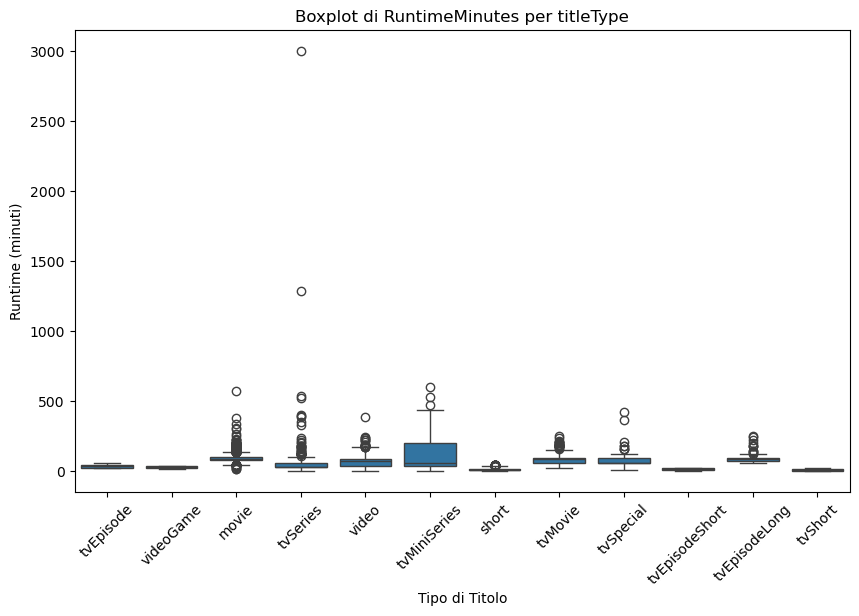

In [66]:
tv_episode = df_train[df_train['titleType'] == 'tvEpisode']

# Calcola i quartili (Q1 e Q3)
Q1 = tv_episode['runtimeMinutes'].quantile(0.045)  # Cambiato in 0.045 come da codice
Q3 = tv_episode['runtimeMinutes'].quantile(0.95)   # Cambiato in 0.95
IQR = Q3 - Q1

# Modifica direttamente la colonna 'titleType' per gli episodi brevi (Q1) e lunghi (Q3)
# Aggiorniamo i tipi di titleType in base ai valori di runtimeMinutes
df_train.loc[(df_train['titleType'] == 'tvEpisode') & (df_train['runtimeMinutes'] < Q1), 'titleType'] = 'tvEpisodeShort'
df_train.loc[(df_train['titleType'] == 'tvEpisode') & (df_train['runtimeMinutes'] > Q3), 'titleType'] = 'tvEpisodeLong'

# Personalizzazione del grafico
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_train, x='titleType', y='runtimeMinutes')

# Personalizzazione del grafico
plt.title('Boxplot di RuntimeMinutes per titleType')
plt.xlabel('Tipo di Titolo')
plt.ylabel('Runtime (minuti)')
plt.xticks(rotation=45)
plt.savefig("runtimeMinutesOutliers.png")
plt.show()


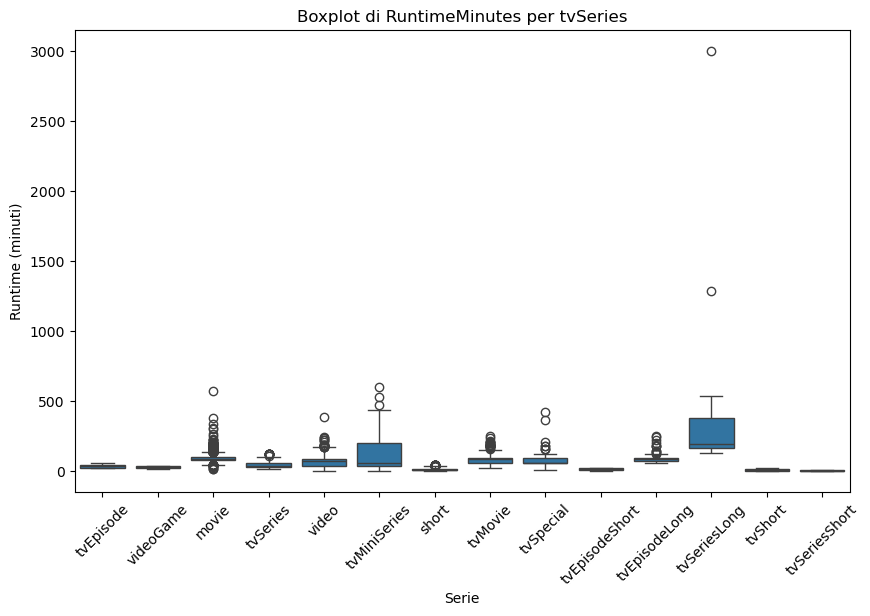

In [67]:
tv_Series = df_train[df_train['titleType'] == 'tvSeries']

# Calcola i quartili (Q1 e Q3)
Q1 = tv_Series['runtimeMinutes'].quantile(0.045)  # Cambiato in 0.045 come da codice
Q3 = tv_Series['runtimeMinutes'].quantile(0.95)   # Cambiato in 0.95
IQR = Q3 - Q1

# Modifica direttamente la colonna 'titleType' per gli episodi brevi (Q1) e lunghi (Q3)
# Aggiorniamo i tipi di titleType in base ai valori di runtimeMinutes
df_train.loc[(df_train['titleType'] == 'tvSeries') & (df_train['runtimeMinutes'] < Q1), 'titleType'] = 'tvSeriesShort'
df_train.loc[(df_train['titleType'] == 'tvSeries') & (df_train['runtimeMinutes'] > Q3), 'titleType'] = 'tvSeriesLong'

# Personalizzazione del grafico
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_train, x='titleType', y='runtimeMinutes')

# Personalizzazione del grafico
plt.title('Boxplot di RuntimeMinutes per tvSeries')
plt.xlabel('Serie')
plt.ylabel('Runtime (minuti)')
plt.xticks(rotation=45)
plt.show()


## Encoding features

In [937]:
df_train.head()

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,worstRating,bestRating,totalImages,...,titleType,awardNominationsExcludeWins,canHaveEpisodes,isRatable,isAdult,numRegions,userReviewsTotal,ratingCount,countryOfOrigin,genres
0,Neogenic Nightmare Chapter 3: Hydro-Man,"(7, 8]",1995,\N,NaN,0.0,779,1,10,1,...,tvEpisode,0,False,True,0,1,0,781,['US'],"Action,Adventure,Animation"
1,Looping,"(5, 6]",1982,\N,NaN,0.0,11,1,10,1,...,videoGame,0,False,True,0,1,0,11,['XWG'],Action
2,Idealnaya para,"(5, 6]",1992,\N,NaN,0.0,38,1,10,1,...,movie,0,False,True,0,1,1,38,['RU'],Comedy
3,MasterChef Celebrity México,"(5, 6]",2021,\N,NaN,0.0,15,1,10,22,...,tvSeries,0,True,True,0,1,0,15,['MX'],Reality-TV
4,Seutateueob,"(7, 8]",2020,2020,80.0,1.0,15718,1,10,347,...,tvSeries,1,True,True,0,32,452,15746,['KR'],"Comedy,Drama,Romance"


In [938]:
###originalTitle: non é molto utile per il clustering perché é (quasi sempre) unico per ogni riga. Per il clustering forse sarebbe meglio 
# droppare questo feature - tranne se ci serve per qulcosa di specifico.

In [939]:
### rating: variabile categorica su scala.

In [940]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_train['rating_encoded'] = le.fit_transform(df_train['rating'])

In [941]:
### titleType: Label Encoding

In [942]:
le = LabelEncoder()
df_train['titleType_encoded'] = le.fit_transform(df_train['titleType'])

In [943]:
### canHaveEpisodes: trasformazione in numeri binari

In [944]:
df_train['canHaveEpisodes'] = df_train['canHaveEpisodes'].astype(int)

In [945]:
### isRatable: stessa cosa, trasformare in numeri binari

In [946]:
df_train['isRatable'] = df_train['isRatable'].astype(int)


In [947]:
df_train.head()

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,worstRating,bestRating,totalImages,...,canHaveEpisodes,isRatable,isAdult,numRegions,userReviewsTotal,ratingCount,countryOfOrigin,genres,rating_encoded,titleType_encoded
0,Neogenic Nightmare Chapter 3: Hydro-Man,"(7, 8]",1995,\N,NaN,0.0,779,1,10,1,...,0,1,0,1,0,781,['US'],"Action,Adventure,Animation",7,2
1,Looping,"(5, 6]",1982,\N,NaN,0.0,11,1,10,1,...,0,1,0,1,0,11,['XWG'],Action,5,13
2,Idealnaya para,"(5, 6]",1992,\N,NaN,0.0,38,1,10,1,...,0,1,0,1,1,38,['RU'],Comedy,5,0
3,MasterChef Celebrity México,"(5, 6]",2021,\N,NaN,0.0,15,1,10,22,...,1,1,0,1,0,15,['MX'],Reality-TV,5,7
4,Seutateueob,"(7, 8]",2020,2020,80.0,1.0,15718,1,10,347,...,1,1,0,32,452,15746,['KR'],"Comedy,Drama,Romance",7,7


In [948]:
### countryOfOrigin: anche qui é necessaria una trasformazione in numeri delle categorie

In [949]:
paesi_completi = set([paese for sublist in df_train['countryOfOrigin'] for paese in sublist]) # Estrarre tutte le combinazioni uniche da countryOfOrigin

for paese in paesi_completi: # creazione di colonna binaria per ogni paese unico
    df_train['paese'] = df_train['countryOfOrigin'].apply(lambda x: 1 if paese in x else 0)


In [950]:
#df_train['countryOfOrigin_encoded'] = le.fit_transform(df_train['countryOfOrigin'])

In [951]:
### genres: contiene diversi generi in forma di una lista di stringhe. Utilizzo di Multi-Hot Encoding 
# dove ogni genere diventa un feature binario 

In [952]:
# Iniziamo a dividere i generi in generi individuali - si applica l'One-Hot Encoding
df_train['genres'] = df_train['genres'].apply(lambda x: x.split(','))  # divisione di generi se sono divisi 

from sklearn.preprocessing import MultiLabelBinarizer # utilizzo Multi-Hot Encoding per ogni genere
mlb = MultiLabelBinarizer()
genres_encoded = pd.DataFrame(mlb.fit_transform(df_train['genres']), columns=mlb.classes_)

df_train = pd.concat([df_train, genres_encoded], axis=1)
df_train.drop(columns=['genres'], inplace=True)  # droppa la colonna genres originale


### Risultato finale df_train

In [954]:
df_train.head()

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,worstRating,bestRating,totalImages,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,\N
0,Neogenic Nightmare Chapter 3: Hydro-Man,"(7, 8]",1995,\N,NaN,0.0,779,1,10,1,...,0,0,0,0,0,0,0,0,0,0
1,Looping,"(5, 6]",1982,\N,NaN,0.0,11,1,10,1,...,0,0,0,0,0,0,0,0,0,0
2,Idealnaya para,"(5, 6]",1992,\N,NaN,0.0,38,1,10,1,...,0,0,0,0,0,0,0,0,0,0
3,MasterChef Celebrity México,"(5, 6]",2021,\N,NaN,0.0,15,1,10,22,...,1,0,0,0,0,0,0,0,0,0
4,Seutateueob,"(7, 8]",2020,2020,80.0,1.0,15718,1,10,347,...,0,1,0,0,0,0,0,0,0,0


## Verifica Valori min e max

In [956]:
sorted_df = df_train.sort_values(by='runtimeMinutes', ascending=True) # vado a vedere se ci sono valori non corretti. In questo caso
# possiamo osservare un valore 0 che probabilmente é un errore 
sorted_df.head(10)

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,worstRating,bestRating,totalImages,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,\N
9240,V-r,"(5, 6]",2006,\N,0.0,NaN,6,1,10,0,...,0,0,0,1,0,0,0,0,0,0
7184,For Milo,"(6, 7]",2020,\N,1.0,1.0,17,1,10,1,...,0,0,0,1,0,0,0,0,0,0
15997,Partie de cartes,"(5, 6]",1897,\N,1.0,0.0,519,1,10,4,...,0,0,0,1,0,0,0,0,0,0
5376,The Grinch: Olympics,"(4, 5]",2018,\N,1.0,0.0,35,1,10,1,...,0,0,0,0,0,0,0,0,0,0
3914,Not a Robot,"(8, 9]",2020,\N,1.0,2.0,5,1,10,2,...,0,0,1,0,0,0,0,0,0,0
580,Heads-Up Display,"(9, 10]",2012,\N,1.0,0.0,19,1,10,8,...,0,0,0,1,1,0,0,0,0,0
9672,The Broker's Athletic Typewriter,"(4, 5]",1905,\N,1.0,0.0,19,1,10,0,...,0,0,0,1,0,0,0,0,0,0
9095,De frente,"(4, 5]",2016,\N,1.0,NaN,11,1,10,0,...,0,0,0,1,0,0,0,0,0,0
12457,Danse indienne,"(4, 5]",1902,\N,1.0,NaN,76,1,10,0,...,0,0,0,1,0,0,0,0,0,0
5645,Seminary Girls,"(5, 6]",1897,\N,1.0,0.0,938,1,10,2,...,0,0,0,1,0,0,0,0,0,0


In [957]:
df_train = df_train[df_train['runtimeMinutes'] != 0]

In [958]:
sorted_df = df_train.sort_values(by='runtimeMinutes', ascending=True) # vado a vedere se ci sono valori non corretti. In questo caso
# possiamo osservare un valore 0 che probabilmente é un errore 
sorted_df.head(10)

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,worstRating,bestRating,totalImages,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,\N
853,A Morning Bath,"(4, 5]",1896,\N,1.0,0.0,553,1,10,2,...,0,0,0,1,0,0,0,0,0,0
13271,Nègres Ashantis: Toilette d'un negrillon II,"(4, 5]",1897,\N,1.0,NaN,90,1,10,1,...,0,0,0,1,0,0,0,0,0,0
14141,Querelle enfantine,"(5, 6]",1896,\N,1.0,0.0,970,1,10,2,...,0,0,0,1,0,0,0,0,0,0
3872,Rock Bottom,"(7, 8]",2012,\N,1.0,0.0,21,1,10,1,...,0,0,0,1,0,0,0,0,0,0
7663,Lego Scooby-Doo,"(6, 7]",2015,\N,1.0,0.0,93,1,10,37,...,0,0,0,0,0,0,0,0,0,0
10546,GQ: Bella Thorne,"(5, 6]",2017,\N,1.0,0.0,33,1,10,7,...,0,0,0,1,0,0,0,0,0,0
3914,Not a Robot,"(8, 9]",2020,\N,1.0,2.0,5,1,10,2,...,0,0,1,0,0,0,0,0,0,0
8010,Malibu Days,"(7, 8]",2012,\N,1.0,0.0,13,1,10,1,...,0,0,0,1,0,0,0,0,0,0
2483,L'impressionniste fin de siècle,"(6, 7]",1899,\N,1.0,0.0,1115,1,10,5,...,0,0,0,1,0,0,0,0,0,0
3980,Heritage Minutes,"(7, 8]",1991,\N,1.0,0.0,106,1,10,116,...,0,0,0,1,0,0,0,0,0,0
